In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np

from sklearn import preprocessing

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2021-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [4]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-10,175.210007,179.630005,174.690002,179.449997,115228100
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000
2021-12-14,175.250000,177.740005,172.210007,174.330002,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,130687600
2021-12-16,179.279999,181.139999,173.121094,173.468002,89166793


# Log Ratio = Log(T / T-1)

In [5]:
data_log_ratio = data.copy()
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [6]:
data_log_ratio_t = data_log_ratio
data_log_ratio_t_minus_1 = data_log_ratio.shift(-1)

In [7]:
data_log_ratio_t.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [8]:
data_log_ratio_t_minus_1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,132.701930,132.791375,125.983346,128.617111,143301900.0
2021-01-04,128.100285,130.932829,127.643097,130.207291,97664900.0
2021-01-05,126.937466,130.247065,125.605672,125.824326,155088000.0
2021-01-06,127.573531,130.823500,127.076595,130.117844,109578200.0
2021-01-07,131.618598,131.817384,129.432080,131.240936,105158200.0


In [9]:
data_log_ratio = data_log_ratio_t / data_log_ratio_t_minus_1
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,1.004194,1.008457,1.039129,1.025346,0.691663
2021-01-04,1.035922,1.014195,0.986997,0.987787,1.467281
2021-01-05,1.009161,1.005265,1.016221,1.034834,0.629739
2021-01-06,0.995014,0.995594,0.988425,0.967003,1.415318
2021-01-07,0.969267,0.992460,0.981801,0.991443,1.042032


In [10]:
data_log_ratio = data_log_ratio.apply(np.log)
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,0.004185,0.008422,0.038383,0.025030,-0.368657
2021-01-04,0.035292,0.014095,-0.013088,-0.012288,0.383411
2021-01-05,0.009119,0.005251,0.016091,0.034241,-0.462450
2021-01-06,-0.004998,-0.004416,-0.011643,-0.033554,0.347354
2021-01-07,-0.031215,-0.007568,-0.018366,-0.008594,0.041173


<AxesSubplot:xlabel='Date'>

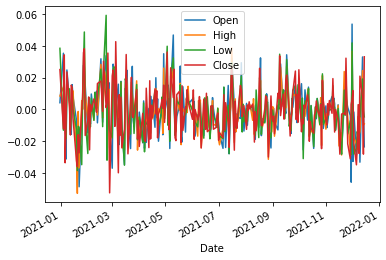

In [11]:
data_log_ratio[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

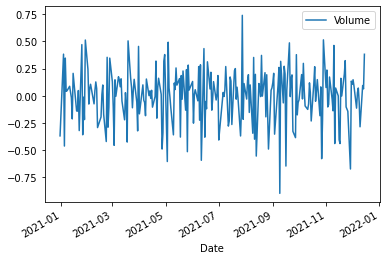

In [12]:
data_log_ratio[['Volume']].plot()

# Log Diff = Log(T) - Log(T-1)

In [13]:
data_log_diff = data.copy()
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [14]:
data_log_diff = data_log_diff.apply(np.log)
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464
2021-01-05,4.852813,4.874684,4.849238,4.869128,18.397053
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149


In [15]:
data_log_diff_t = data_log_diff
data_log_diff_t_minus_1 = data_log_diff.shift(-1)
data_log_diff = data_log_diff_t - data_log_diff_t_minus_1
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,0.004185,0.008422,0.038383,0.025030,-0.368657
2021-01-04,0.035292,0.014095,-0.013088,-0.012288,0.383411
2021-01-05,0.009119,0.005251,0.016091,0.034241,-0.462450
2021-01-06,-0.004998,-0.004416,-0.011643,-0.033554,0.347354
2021-01-07,-0.031215,-0.007568,-0.018366,-0.008594,0.041173


<AxesSubplot:xlabel='Date'>

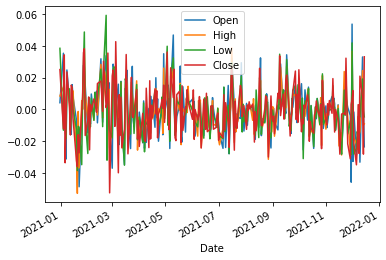

In [16]:
data_log_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

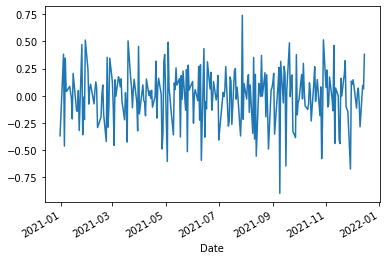

In [17]:
data_log_diff['Volume'].plot()

Now I realized that is the same thing. DUUUUUH!

# Difference Between the Mean = T - Mean

In [18]:
data_diff_mean = data.copy()
data_diff_mean = data_diff_mean.loc[(data_diff_mean.index > '2021-01-01') & (data_diff_mean.index < '2021-01-10')]
data_diff_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618598,131.817384,129.432080,131.240936,105158200


In [19]:
data_diff_mean.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618598,131.817384,129.432080,131.240936,105158200


<AxesSubplot:xlabel='Date'>

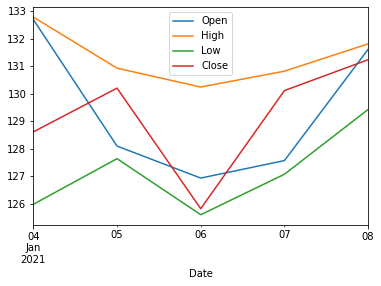

In [20]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

In [21]:
average_price = data_diff_mean.mean(axis=0)
average_price

Open      1.293864e+02
High      1.313224e+02
Low       1.271482e+02
Close     1.292015e+02
Volume    1.221582e+08
dtype: float64

In [22]:
data_diff_mean = average_price - data_diff_mean
data_diff_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,-3.315568,-1.468944,1.164812,0.584390,-21143660.0
2021-01-05,1.286077,0.389602,-0.494939,-1.005789,24493340.0
2021-01-06,2.448896,1.075366,1.542486,3.377176,-32929760.0
2021-01-07,1.812831,0.498931,0.071563,-0.916342,12580040.0
2021-01-08,-2.232236,-0.494954,-2.283922,-2.039435,17000040.0


<AxesSubplot:xlabel='Date'>

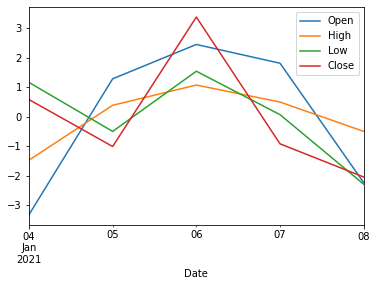

In [23]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

This method looks exciting

<AxesSubplot:xlabel='Date'>

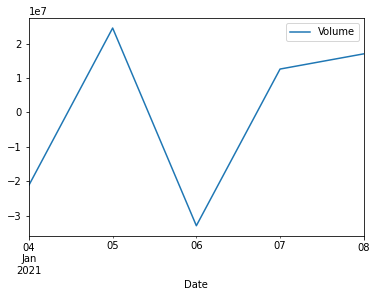

In [24]:
data_diff_mean[['Volume']].plot()

We should find another way to scale the volume

# Relative Values - T-N, T-N+1 ... T-1 / T

In [25]:
data_relative = data.copy()
data_relative = data_relative.loc[(data_relative.index > '2021-01-01') & (data_relative.index < '2021-01-10')]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618598,131.817384,129.432080,131.240936,105158200


In [26]:
data_relative[['Open', 'High', 'Low', 'Close']] /= data['Close'].iloc[-1]
data_relative['Volume'] /= data['Volume'].iloc[-1]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,0.764994,0.765509,0.726263,0.741446,1.607122
2021-01-05,0.738466,0.754795,0.735831,0.750613,1.095306
2021-01-06,0.731763,0.750842,0.724086,0.725346,1.739302
2021-01-07,0.735430,0.754165,0.732565,0.750097,1.228913
2021-01-08,0.758749,0.759895,0.746144,0.756571,1.179343


<AxesSubplot:xlabel='Date'>

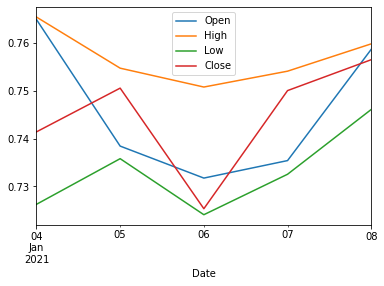

In [27]:
data_relative[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

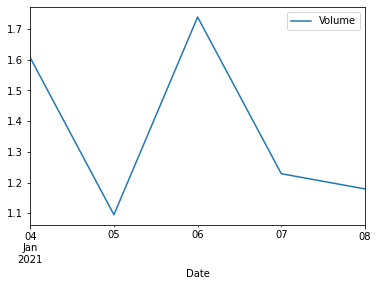

In [28]:
data_relative[['Volume']].plot()

# Normalization

In [29]:
data_for_norm = data.copy()
normalizer = preprocessing.Normalizer().fit(data_for_norm)

In [30]:
data_for_norm = normalizer.transform(data_for_norm)
data_for_norm[:5]

array([[1.34446195e-06, 1.35108001e-06, 1.32079749e-06, 1.33052399e-06,
        1.00000000e+00],
       [9.26030499e-07, 9.26654670e-07, 8.79146377e-07, 8.97525512e-07,
        1.00000000e+00],
       [1.31163074e-06, 1.34063342e-06, 1.30694954e-06, 1.33320457e-06,
        1.00000000e+00],
       [8.18486705e-07, 8.39826841e-07, 8.09899362e-07, 8.11309228e-07,
        1.00000000e+00],
       [1.16422364e-06, 1.19388254e-06, 1.15968865e-06, 1.18744279e-06,
        1.00000000e+00]])

In [31]:
data_for_norm[-5:]

array([[1.52054930e-06, 1.55890798e-06, 1.51603647e-06, 1.55734579e-06,
        1.00000000e+00],
       [1.18195994e-06, 1.18855110e-06, 1.14548052e-06, 1.14685099e-06,
        1.00000000e+00],
       [1.25735039e-06, 1.27521521e-06, 1.23553962e-06, 1.25074976e-06,
        1.00000000e+00],
       [1.33991290e-06, 1.37350445e-06, 1.31848773e-06, 1.37197411e-06,
        1.00000000e+00],
       [2.01061396e-06, 2.03147375e-06, 1.94154223e-06, 1.94543278e-06,
        1.00000000e+00]])

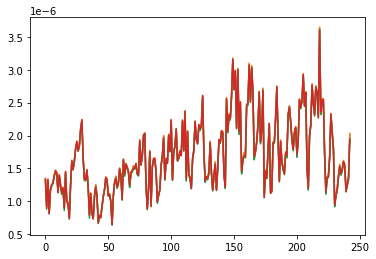

In [32]:
plt.plot(data_for_norm[:, :4])

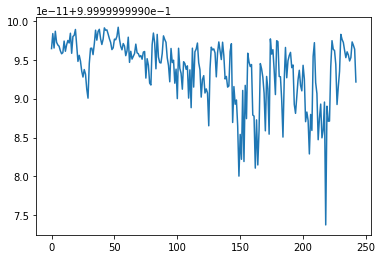

In [33]:
plt.plot(data_for_norm[:, 4])

# Robust Scaler

<AxesSubplot:xlabel='Date'>

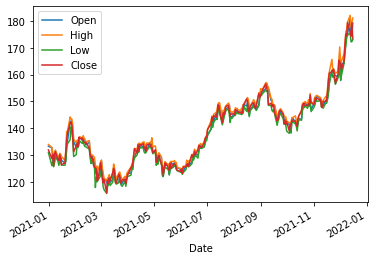

In [39]:
data_for_scaling = data.copy()
normalizer = preprocessing.RobustScaler().fit(data_for_scaling)
data_for_scaling[['Open', 'High', 'Low', 'Close']].plot()

In [35]:
data_for_scaling = normalizer.transform(data_for_scaling)
data_for_scaling[:5]

array([[-0.16905671, -0.25633211, -0.22435766, -0.24324608,  0.34410668],
       [-0.19629832, -0.3130166 , -0.46711002, -0.40222302,  1.53282782],
       [-0.42152943, -0.40682161, -0.38537773, -0.32467413,  0.30505146],
       [-0.4784445 , -0.44143365, -0.48570809, -0.53841987,  1.84991035],
       [-0.44731179, -0.41233968, -0.41327438, -0.32903622,  0.62555605]])

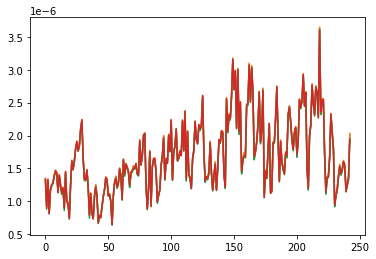

In [36]:
plt.plot(data_for_norm[:, :4])

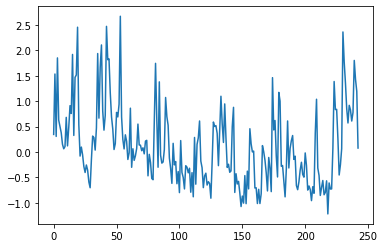

In [37]:
plt.plot(data_for_scaling[:, 4])